### Re-code the house price machine learning

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

In [5]:
#导出数据，X为特征，y为房价
data = load_boston()
X,y = data['data'], data['target']
print(X.shape,len(y))

(506, 13) 506


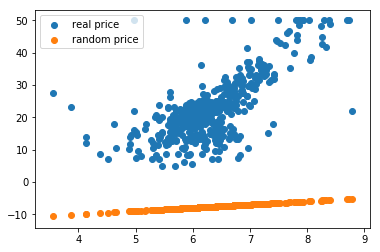

In [42]:
#以X中的一个特征和y作图
def price(rm,k,b):
    return rm * k + b
#选择X的第五个特征，房间数量
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### 1.Random Choose Method to get optimal k and b

In [43]:
#为了得到最优的k和b，这里引入loss函数去衡量k和b的好坏
#这里的loss为平方损失函数
def loss(y,y_hat):
    return sum(np.square(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [17]:
trying_times = 2000
min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
        print("In loop: {},b: {}, k: {}, loss: {}".format(i,best_b,best_k,min_loss))

In loop: 0,b: 56.90514925135389, k: -23.69689134394912, loss: 13696.238135017464
In loop: 14,b: 50.60470364926209, k: -2.936459543380238, loss: 207.49835240408999
In loop: 63,b: 5.659003870354738, k: 1.8585917049429526, loss: 96.42122183770657
In loop: 105,b: -23.447312048295842, k: 6.933840041619277, loss: 51.69356655184605
In loop: 1325,b: -29.53033915717809, k: 8.711909580060166, loss: 50.90102450210367


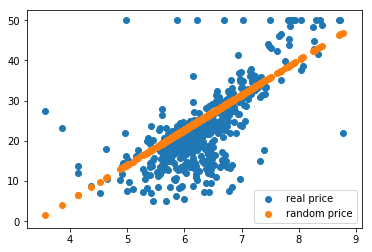

In [18]:
k=8.711909580060166
b=-29.53033915717809
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

In [20]:
import pandas as pd

In [22]:
df = pd.DataFrame(X,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2.Supervised Direction to get optimal k and b

In [33]:
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100

direction = [(+1,-1),(+1,-1),(+1,-1),(+1,-1)]
next_direction = random.choice(direction)
scalar = 0.1

for i in range(trying_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k + k_direction*scalar, best_b + b_direction*scalar
    price_by_random = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = current_b,current_k
        print("In loop: {},b: {}, k: {}, loss: {}".format(i,best_b,best_k,min_loss))
    else:
        next_direction = random.choice(direction)

In loop: 0,b: -35.063558145187464, k: -23.664388092835473, loss: 43139.85821063694
In loop: 1,b: -35.163558145187466, k: -23.564388092835472, loss: 42918.85017849012
In loop: 2,b: -35.26355814518747, k: -23.46438809283547, loss: 42698.41054745969
In loop: 3,b: -35.36355814518747, k: -23.36438809283547, loss: 42478.539317545845
In loop: 4,b: -35.46355814518747, k: -23.264388092835468, loss: 42259.23648874842
In loop: 5,b: -35.56355814518747, k: -23.164388092835466, loss: 42040.50206106752
In loop: 6,b: -35.66355814518747, k: -23.064388092835465, loss: 41822.33603450304
In loop: 7,b: -35.763558145187474, k: -22.964388092835463, loss: 41604.73840905515
In loop: 8,b: -35.863558145187476, k: -22.864388092835462, loss: 41387.70918472365
In loop: 9,b: -35.96355814518748, k: -22.76438809283546, loss: 41171.248361508646
In loop: 10,b: -36.06355814518748, k: -22.66438809283546, loss: 40955.3559394101
In loop: 11,b: -36.16355814518748, k: -22.564388092835458, loss: 40740.03191842805
In loop: 12,b

In loop: 173,b: -52.36355814518771, k: -6.3643880928354, loss: 13362.14046025411
In loop: 174,b: -52.46355814518771, k: -6.2643880928354, loss: 13239.46582125868
In loop: 175,b: -52.56355814518771, k: -6.1643880928354005, loss: 13117.359583379755
In loop: 176,b: -52.663558145187714, k: -6.064388092835401, loss: 12995.821746617292
In loop: 177,b: -52.763558145187716, k: -5.964388092835401, loss: 12874.852310971308
In loop: 178,b: -52.86355814518772, k: -5.8643880928354015, loss: 12754.451276441809
In loop: 179,b: -52.96355814518772, k: -5.764388092835402, loss: 12634.61864302879
In loop: 180,b: -53.06355814518772, k: -5.664388092835402, loss: 12515.35441073225
In loop: 181,b: -53.16355814518772, k: -5.564388092835403, loss: 12396.658579552204
In loop: 182,b: -53.26355814518772, k: -5.464388092835403, loss: 12278.531149488626
In loop: 183,b: -53.363558145187724, k: -5.364388092835403, loss: 12160.972120541548
In loop: 184,b: -53.463558145187726, k: -5.264388092835404, loss: 12043.9814927

In loop: 272,b: -62.26355814518785, k: 3.5356119071645966, loss: 3974.665015762038
In loop: 273,b: -62.36355814518785, k: 3.6356119071645967, loss: 3908.2620872983466
In loop: 274,b: -62.463558145187854, k: 3.735611907164597, loss: 3842.427559951141
In loop: 275,b: -62.563558145187855, k: 3.835611907164597, loss: 3777.1614337204164
In loop: 276,b: -62.66355814518786, k: 3.935611907164597, loss: 3712.463708606177
In loop: 277,b: -62.76355814518786, k: 4.035611907164597, loss: 3648.3343846084167
In loop: 278,b: -62.86355814518786, k: 4.135611907164597, loss: 3584.7734617271385
In loop: 279,b: -62.96355814518786, k: 4.235611907164596, loss: 3521.780939962347
In loop: 280,b: -63.06355814518786, k: 4.335611907164596, loss: 3459.356819314032
In loop: 281,b: -63.163558145187864, k: 4.435611907164596, loss: 3397.5010997822033
In loop: 282,b: -63.263558145187865, k: 4.535611907164595, loss: 3336.213781366854
In loop: 283,b: -63.363558145187866, k: 4.635611907164595, loss: 3275.494864067988
In l

In loop: 378,b: -72.86355814518737, k: 14.135611907164561, loss: 99.10681183456705
In loop: 379,b: -72.96355814518736, k: 14.23561190716456, loss: 92.95440171799335
In loop: 380,b: -73.06355814518736, k: 14.33561190716456, loss: 87.37039271790198
In loop: 381,b: -73.16355814518735, k: 14.43561190716456, loss: 82.35478483429276
In loop: 382,b: -73.26355814518735, k: 14.53561190716456, loss: 77.90757806716576
In loop: 383,b: -73.36355814518734, k: 14.63561190716456, loss: 74.0287724165209
In loop: 384,b: -73.46355814518733, k: 14.735611907164559, loss: 70.7183678823584
In loop: 385,b: -73.56355814518733, k: 14.835611907164559, loss: 67.9763644646781
In loop: 386,b: -73.66355814518732, k: 14.935611907164558, loss: 65.80276216347998
In loop: 387,b: -73.76355814518732, k: 15.035611907164558, loss: 64.19756097876402
In loop: 388,b: -73.86355814518731, k: 15.135611907164558, loss: 63.16076091053036
In loop: 389,b: -73.9635581451873, k: 15.235611907164557, loss: 62.69236195877888


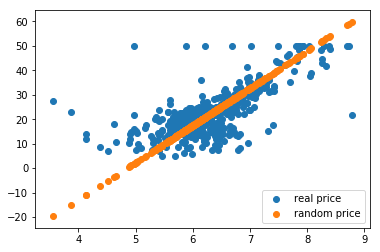

In [34]:
k=15.235611907164557
b=-73.9635581451873
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### 3.Gradient Descent to get optimal k and b

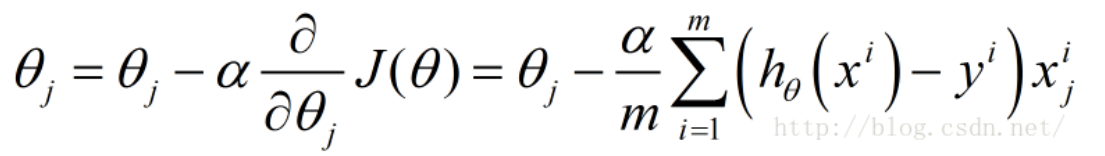

In [57]:
trying_times = 20000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100
n = 0
alpha = 0.00001
diff = 0
diff_k,diff_b =0,0

while n < trying_times:
    for i in range(len(X_rm)):
        #y = x0*k + x1*b, 其中x1=1
        diff_k += (best_k * X_rm[i-1] + best_b - y[i-1]) * X_rm[i-1]
        diff_b += (best_k * X_rm[i-1] + best_b - y[i-1]) * 1
    n += 1
    #梯度下降
    best_k -= alpha * diff_k / len(X_rm)
    best_b -= alpha * diff_b / len(X_rm)
    
    price_by_random = [price(r,best_k,best_b) for r in X_rm]
    gradient_loss = loss(y,price_by_random)
    if gradient_loss < min_loss:
        min_loss = gradient_loss
        print("In loop: {},k: {}, b: {}, loss: {}".format(n,best_k,best_b,gradient_loss))
    else: continue

In loop: 1,k: -13.277171311707537, b: -3.196742174406797, loss: 12208.821724657111
In loop: 2,k: -13.263225844465344, b: -3.194558290866708, loss: 12188.9094319058
In loop: 3,k: -13.242314786328864, b: -3.191283588428176, loss: 12159.081792877101
In loop: 4,k: -13.214446705292088, b: -3.186919414021775, loss: 12119.38769279127
In loop: 5,k: -13.179633019884808, b: -3.181467562696254, loss: 12069.892187243948
In loop: 6,k: -13.137887994493607, b: -3.1749302768829706, loss: 12010.676395584922
In loop: 7,k: -13.089228733516707, b: -3.1673102454770037, loss: 11941.837367969838
In loop: 8,k: -13.033675174355041, b: -3.158610602735315, loss: 11863.487926302218
In loop: 9,k: -12.971250079242447, b: -3.1488349269924147, loss: 11775.756479326885
In loop: 10,k: -12.90197902591832, b: -3.1379872391940538, loss: 11678.786812177972
In loop: 11,k: -12.825890397146546, b: -3.126072001249548, loss: 11572.737850725753
In loop: 12,k: -12.743015369085008, b: -3.1130941142034056, loss: 11457.7834011094
In

In loop: 4733,k: 9.524674878580178, b: -37.0707852171774, loss: 43.7538125832001
In loop: 13579,k: 9.068639957957636, b: -34.80486903098311, loss: 43.7198451372216
In loop: 13734,k: 8.820416831200012, b: -32.96392850382051, loss: 43.64369740368173


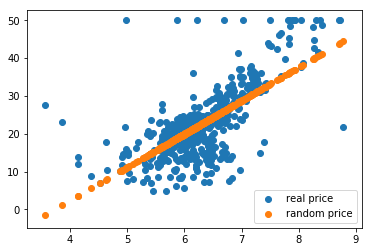

In [58]:
k=8.820416831200012
b=-32.96392850382051
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### 4. Try different Loss function and learning rate.

In [59]:
def loss_2(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [61]:
#绝对损失函数 & 随机选择k,b
trying_times = 2000
min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random = [price(r,k,b) for r in X_rm]
    
    current_loss = loss_2(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
        print("In loop: {},k: {}, b: {}, loss: {}".format(i,best_k,best_b,min_loss))

In loop: 0,k: 75.53365074757838, b: 74.88269189495406, loss: 527.0512644612943
In loop: 1,k: 34.40430379945255, b: 74.97202113245689, loss: 268.6576855392833
In loop: 2,k: -20.876877180788227, b: 55.857622647259774, loss: 97.87872390775226
In loop: 7,k: 19.75028649494854, b: -5.302342165691471, loss: 96.28818117640093
In loop: 8,k: 12.939593300628658, b: -7.174264876303155, loss: 51.61354181506377
In loop: 59,k: -4.318252978165887, b: 62.75402908876234, loss: 15.728022750376914
In loop: 81,k: -8.613342562395971, b: 87.58628367911291, loss: 15.660980916216298
In loop: 113,k: -3.5234624442660447, b: 42.27711836618627, loss: 7.861794532316259
In loop: 242,k: 10.231002509849432, b: -45.12072117634538, loss: 5.639253867217044
In loop: 278,k: 12.86626681258636, b: -55.77535990326301, loss: 5.173530143981314
In loop: 1383,k: 7.8959592393750455, b: -27.867086358411015, loss: 4.622556543154311


In [62]:
#绝对损失函数 & 有监督的选择方向
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100

direction = [(+1,-1),(+1,-1),(+1,-1),(+1,-1)]
next_direction = random.choice(direction)
scalar = 0.1

for i in range(trying_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k + k_direction*scalar, best_b + b_direction*scalar
    price_by_random = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss_2(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b,best_k = current_b,current_k
        print("In loop: {},b: {}, k: {}, loss: {}".format(i,best_b,best_k,min_loss))
    else:
        next_direction = random.choice(direction)

In loop: 0,b: -32.91207775991631, k: -34.78199178067856, loss: 274.0369856894663
In loop: 1,b: -33.01207775991631, k: -34.68199178067856, loss: 273.5085222507312
In loop: 2,b: -33.11207775991631, k: -34.58199178067856, loss: 272.98005881199583
In loop: 3,b: -33.21207775991631, k: -34.481991780678555, loss: 272.451595373261
In loop: 4,b: -33.31207775991631, k: -34.381991780678554, loss: 271.9231319345259
In loop: 5,b: -33.412077759916315, k: -34.28199178067855, loss: 271.39466849579065
In loop: 6,b: -33.512077759916316, k: -34.18199178067855, loss: 270.86620505705537
In loop: 7,b: -33.61207775991632, k: -34.08199178067855, loss: 270.33774161832014
In loop: 8,b: -33.71207775991632, k: -33.98199178067855, loss: 269.809278179585
In loop: 9,b: -33.81207775991632, k: -33.88199178067855, loss: 269.2808147408498
In loop: 10,b: -33.91207775991632, k: -33.781991780678545, loss: 268.7523513021142
In loop: 11,b: -34.01207775991632, k: -33.681991780678544, loss: 268.2238878633791
In loop: 12,b: -34

In loop: 267,b: -59.61207775991669, k: -8.081991780678322, loss: 132.93724754717275
In loop: 268,b: -59.71207775991669, k: -7.981991780678323, loss: 132.40878410843766
In loop: 269,b: -59.81207775991669, k: -7.881991780678323, loss: 131.88032066970246
In loop: 270,b: -59.91207775991669, k: -7.781991780678323, loss: 131.35185723096723
In loop: 271,b: -60.01207775991669, k: -7.681991780678324, loss: 130.82339379223203
In loop: 272,b: -60.112077759916694, k: -7.581991780678324, loss: 130.29493035349685
In loop: 273,b: -60.212077759916696, k: -7.4819917806783245, loss: 129.76646691476176
In loop: 274,b: -60.3120777599167, k: -7.381991780678325, loss: 129.2380034760265
In loop: 275,b: -60.4120777599167, k: -7.281991780678325, loss: 128.70954003729145
In loop: 276,b: -60.5120777599167, k: -7.1819917806783256, loss: 128.18107659855616
In loop: 277,b: -60.6120777599167, k: -7.081991780678326, loss: 127.65261315982116
In loop: 278,b: -60.7120777599167, k: -6.981991780678326, loss: 127.124149721

In [70]:
#绝对损失函数 & 梯度下降法
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100
n = 0
alpha = 0.00001
diff = 0
diff_k,diff_b =0,0

while n < trying_times:
    for i in range(len(X_rm)):
        #y = x0*k + x1*b, 其中x1=1
        diff_k += (best_k * X_rm[i-1] + best_b - y[i-1]) * X_rm[i-1]
        diff_b += (best_k * X_rm[i-1] + best_b - y[i-1]) * 1
    n += 1
    #梯度下降
    best_k -= alpha * diff_k / len(X_rm)
    best_b -= alpha * diff_b / len(X_rm)
    
    price_by_random = [price(r,best_k,best_b) for r in X_rm]
    gradient_loss = loss_2(y,price_by_random)
    if gradient_loss < min_loss:
        min_loss = gradient_loss
        print("In loop: {},k: {}, b: {}, loss: {}".format(n,best_k,best_b,min_loss))
    else: continue

In loop: 1,k: 85.49154897080966, b: -19.643013955320388, loss: 495.1073082104882
In loop: 2,k: 85.42855195837899, b: -19.652918130987246, loss: 494.7014908441984
In loop: 3,k: 85.3340887092068, b: -19.667769321562545, loss: 494.0929726695351
In loop: 4,k: 85.20819793185144, b: -19.687561441864542, loss: 493.2820030408145
In loop: 5,k: 85.05093121304692, b: -19.712286382196947, loss: 492.2689142714982
In loop: 6,k: 84.86235299656401, b: -19.741934011672065, loss: 491.05412149800907
In loop: 7,k: 84.64254055680294, b: -19.776492182362166, loss: 489.63812250962854
In loop: 8,k: 84.39158396712843, b: -19.81594673427736, loss: 488.0214975445128
In loop: 9,k: 84.10958606296006, b: -19.860281501168004, loss: 486.2049090519241
In loop: 10,k: 83.7966623996331, b: -19.909478317149166, loss: 484.1891014207823
In loop: 11,k: 83.45294120504704, b: -19.963517024144533, loss: 481.9749006746299
In loop: 12,k: 83.07856332712126, b: -20.022375480146646, loss: 479.5632141331512
In loop: 13,k: 82.67368217

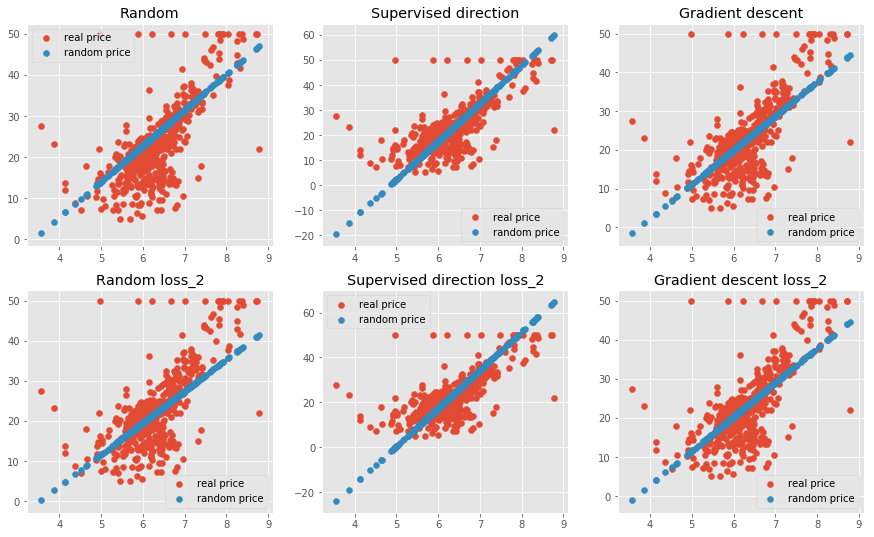

In [85]:
plt.style.use('ggplot')
plt.figure(figsize=(15,9))
plt.subplot(231)
k,b=8.711909580060166,-29.53033915717809
plt.title("Random")
plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,[price(r,k,b) for r in X_rm],label="random price")
plt.legend()

plt.subplot(232)
k,b=15.235611907164557,-73.9635581451873
plt.title("Supervised direction")
plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,[price(r,k,b) for r in X_rm],label="random price")
plt.legend()

plt.subplot(233)
k,b=8.820416831200012,-32.96392850382051
plt.title("Gradient descent")
plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,[price(r,k,b) for r in X_rm],label="random price")
plt.legend()

plt.subplot(234)
k,b=7.8959592393750455,-27.867086358411015
plt.title("Random loss_2")
plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,[price(r,k,b) for r in X_rm],label="random price")
plt.legend()

plt.subplot(235)
b,k = -84.71207775991557,17.01800821932164
plt.title("Supervised direction loss_2")
plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,[price(r,k,b) for r in X_rm],label="random price")
plt.legend()

plt.subplot(236)
k,b= 8.744351757667813,-32.17726720793925
plt.title("Gradient descent loss_2")
plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,[price(r,k,b) for r in X_rm],label="random price")
plt.legend()